# <font color = brown><h1 align= 'center'> Pre-processing of the data</h1></font>

# <font color = "red"><h3 align = "left">Steps involved in data pre-processing : </h3></font>
## 1. Get the dataset
## 2. Importing Libraries
## 3. Importing the dataset
## 4. Missing Values
## 5. Categorical Data
## 6. Splitting Data
## 7. Feature Scaling

### <font color = "green"><h1 align ="center">1. Get the dataset </h1></font>
#### Dig the data from the database
#### Contact the client system

### <font color = "blue"><h1 align = "center">2. Importing the libraries as per the requirement of the algorithm </h1></font>

### <font color = "brown"><h1 align = "center">3. Importing the Dataset </h1> </font>

In [1]:

import pandas as pd
movie = pd.read_csv(r'http://bit.ly/movieusers')
movie.head()

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


In [3]:
pd.read_csv(r'http://bit.ly/movieusers', sep = "|", header = None, usecols = [1,3], nrows = 4)

,1,3
0,24,technician
1,53,other
2,23,writer
3,24,technician


### <font color = "magenta"><h1 align = "center">4. Handling Missing Values</h1></font>

#### Data can have missing values for a number of reasons such as observations that were not recorded and data corruption.

#### Handling missing data is important as many machine learning algorithms do not support data with missing values.

 


### 1. Handle missing data using  pandas:  
### **a. dropna()**
### **b. fillna()**
### **c. interpolate()**

### 2. Handle missing data using Scikit-Learn:  **Using SimpleImputer()**


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [40]:
# Importing the data, parse_dates coverts the day column to date type
data = pd.read_csv(r"C:\Users\admin 2\Downloads\weather_data.csv", parse_dates = ['day'])

In [41]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,NaN,7.0,Sunny
2,2017-01-03,28.0,NaN,Snow
3,2017-01-04,NaN,7.0,0
4,2017-01-05,32.0,NaN,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [42]:
type(data.day[0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
data.tail()

,day,temperature,windspeed,event
2,2017-01-03,28.0,NaN,Snow
3,2017-01-04,NaN,7.0,0
4,2017-01-05,32.0,NaN,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [44]:
type(data.day[0])

pandas._libs.tslibs.timestamps.Timestamp

###  fillna() is a function which is used to fill missing values using different ways

In [45]:
data.fillna(0) # fills all the missing values with 0

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,0.0,7.0,Sunny
2,2017-01-03,28.0,0.0,Snow
3,2017-01-04,0.0,7.0,0
4,2017-01-05,32.0,0.0,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [46]:
#ffill is a method called forward fill, which carry forwards the previous day's value
data.fillna(method = "ffill")

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,32.0,7.0,Sunny
2,2017-01-03,28.0,7.0,Snow
3,2017-01-04,28.0,7.0,0
4,2017-01-05,32.0,7.0,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [47]:
##bfill is a method called backward fill, which carrys backward the next day's value

data.fillna(method = "bfill")

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,28.0,7.0,Sunny
2,2017-01-03,28.0,7.0,Snow
3,2017-01-04,32.0,7.0,0
4,2017-01-05,32.0,2.0,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [48]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,NaN,7.0,Sunny
2,2017-01-03,28.0,NaN,Snow
3,2017-01-04,NaN,7.0,0
4,2017-01-05,32.0,NaN,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [49]:
data.fillna(method ="ffill", axis = 'columns')  #  axis=columns fills the NaN's vertically

,day,temperature,windspeed,event
0,2017-01-01 00:00:00,32,6,Rain
1,2017-01-02 00:00:00,2017-01-02 00:00:00,7,Sunny
2,2017-01-03 00:00:00,28,28,Snow
3,2017-01-04 00:00:00,2017-01-04 00:00:00,7,0
4,2017-01-05 00:00:00,32,32,Rain
5,2017-01-06 00:00:00,31,2,Sunny
6,2017-01-06 00:00:00,34,5,0


In [50]:
#a = data.fillna({'temperature':0, 'windspeed':0, 'event':'No'}, inplace = True)
a

### Interpolate() is a function which comes up with a guess based on the other values in the dataset

In [51]:
data.interpolate()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,30.0,7.0,Sunny
2,2017-01-03,28.0,7.0,Snow
3,2017-01-04,30.0,7.0,0
4,2017-01-05,32.0,4.5,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


### dropna() is a function which will drop rows or columns with missing values

In [52]:
data.dropna()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [53]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,NaN,7.0,Sunny
2,2017-01-03,28.0,NaN,Snow
3,2017-01-04,NaN,7.0,0
4,2017-01-05,32.0,NaN,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [54]:
data.dropna(how = "all") # how = all drops the rows where all the columns of the particular row are missing


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,NaN,7.0,Sunny
2,2017-01-03,28.0,NaN,Snow
3,2017-01-04,NaN,7.0,0
4,2017-01-05,32.0,NaN,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [55]:
#data.set_index("day",inplace = True)
#data.dropna(how = "all")


In [56]:
data.dropna(how = "any") # # how = any drops the rows where all the columns of the particular row are missing



,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


## 2. Handling Missing Values using Scikit-Learn

In [57]:
#from sklearn import impute.SimpleImputer
from sklearn.preprocessing import Imputer


### Imputer is a 2-step transformation i.e.,first it fits to the data and then it transforms.
### Imputer works only on the numerical columns

## Imputation is the process of replacing missing data with substituted values

In [58]:
imputer = Imputer(missing_values = 'NaN', strategy = "mean", axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [59]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,NaN,7.0,Sunny
2,2017-01-03,28.0,NaN,Snow
3,2017-01-04,NaN,7.0,0
4,2017-01-05,32.0,NaN,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


In [60]:
imputer = imputer.fit(data.iloc[:,1:3])

In [61]:
data.iloc[:,1:3] = imputer.transform(data.iloc[:,1:3])

In [62]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,31.4,7.0,Sunny
2,2017-01-03,28.0,5.4,Snow
3,2017-01-04,31.4,7.0,0
4,2017-01-05,32.0,5.4,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


### As Imputer object works only on the numerical values, for the categorical data we deal with mode 

In [73]:
col = ['event']
data[col] = data[col].fillna(data.mode().iloc[0])

In [74]:
#data

In [75]:
#data['event'] = data['event'].fillna(data.mode().iloc[0])

In [76]:
data

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,31.4,7.0,Sunny
2,2017-01-03,28.0,5.4,Snow
3,2017-01-04,31.4,7.0,0
4,2017-01-05,32.0,5.4,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


### 3.Mean Imputation

In [77]:
data.fillna(data.mean())

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,31.4,7.0,Sunny
2,2017-01-03,28.0,5.4,Snow
3,2017-01-04,31.4,7.0,0
4,2017-01-05,32.0,5.4,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


### 3. Median Imputation

In [78]:
data.fillna(data.median())

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-02,31.4,7.0,Sunny
2,2017-01-03,28.0,5.4,Snow
3,2017-01-04,31.4,7.0,0
4,2017-01-05,32.0,5.4,Rain
5,2017-01-06,31.0,2.0,Sunny
6,2017-01-06,34.0,5.0,0


## <font color = "cyan"><h3 align = "center">5. Categorical Data </h3></font>

#### Machine Learning models are based on equations, we need to replace the text by numbers. So that we can include the numbers in the equations.
#### Categorical Variables are of two types: Nominal and Ordinal
##### Nominal: The categories do not have any numeric ordering in between them. They don't have any ordered relationship between each of them.Examples: Male or Female, any colour

##### Ordinal:  The categories have a numerical ordering in between them. Example: Graduate is less than Post Graduate, Post Graduate is less than Ph.D, customer satisfaction survey, high low medium

#### Categorical data can be handled by using dummy variables, which are also called as indicator variables.


#### 1. Can be handled using  pandas with get_dummies()

In [87]:
price = pd.read_csv(r'C:\Users\admin 2\Downloads\homeprices.csv')

In [88]:
price.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [89]:
dummy_set = pd.get_dummies(price.town)
dummy_set

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [90]:
merged = pd.concat([price, dummy_set], axis = 1)

In [91]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [92]:
pd.get_dummies(price, columns = ['town'], drop_first = True)

,area,price,town_robinsville,town_west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


#### Dummy Variable Trap: The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

##### Need to drop the original town column as we have the dummy columns. Also we need to drop one of the dummy variables column in order to avoid the multi-collinearity, which creates the problem of  dummy variable trap.And the dummy variable trap mess up the machine learning model

In [93]:
final = merged.drop(['town','west windsor'], axis = 1)

In [94]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


#### Dummy Variables using LabelEncoder

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [96]:
dfle = price
dfle.town = le.fit_transform(price.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [102]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
x = ohe.fit_transform(price).toarray()
x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.00e+00, 0.00e+00, 0.00e+00, 2.60e+03, 5.50e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.00e+03, 5.65e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.20e+03, 6.10e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.60e+03, 6.80e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 4.00e+03, 7.25e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.60e+03, 5.85e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.80e+03, 6.15e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.30e+03, 6.50e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.60e+03, 7.10e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.60e+03, 5.75e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.90e+03, 6.00e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.10e+03, 6.20e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.60e+03, 6.95e+05]])

In [98]:
x

array([[1.00e+00, 0.00e+00, 0.00e+00, 2.60e+03, 5.50e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.00e+03, 5.65e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.20e+03, 6.10e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.60e+03, 6.80e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 4.00e+03, 7.25e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.60e+03, 5.85e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.80e+03, 6.15e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.30e+03, 6.50e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.60e+03, 7.10e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.60e+03, 5.75e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.90e+03, 6.00e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.10e+03, 6.20e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.60e+03, 6.95e+05]])

In [101]:
x= pd.DataFrame(x)
x

,0,1,2,3,4
0,1.0,0.0,0.0,2600.0,550000.0
1,1.0,0.0,0.0,3000.0,565000.0
2,1.0,0.0,0.0,3200.0,610000.0
3,1.0,0.0,0.0,3600.0,680000.0
4,1.0,0.0,0.0,4000.0,725000.0
5,0.0,0.0,1.0,2600.0,585000.0
6,0.0,0.0,1.0,2800.0,615000.0
7,0.0,0.0,1.0,3300.0,650000.0
8,0.0,0.0,1.0,3600.0,710000.0
9,0.0,1.0,0.0,2600.0,575000.0


In [92]:
#pd.set_option('display.precision',2)

### <font color = "blue"><h3 align = "center">6. Splitting the data </h3></font>

#####  In Machine Learning in order to access the performance of the classifier.You train the classifier using 'training set' and then test the performance of your classifier on unseen 'test set'. An important point to note is that during training the classifier only uses the training  set . The test set must not be used during training the classifier. The test set will only be available during testing the classifier.

##### 1.training set—a subset to train a model.(Model learns patterns between Input and Output)
##### 2.test set—a subset to test the trained model.(To test whether the model has correctly learnt )

# 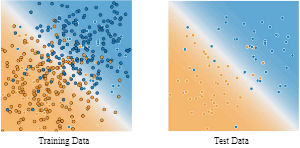

In [4]:
price

NameError: name 'price' is not defined

In [6]:
X = price.iloc[:,0:2] # Preparing input variables
X

NameError: name 'price' is not defined

In [95]:
y = price.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 2)
(3, 2)
(10,)
(3,)


# <font color = "green"><h3 align = "center">7. Feature Scaling </h3></font>

#### All the input variables must be on the same scale.

In [98]:
sample = pd.DataFrame({"Emp ID": [111,112,113,114,115],'Age': [20,25,30,35,40], "Salary": [100000,150000,200000,250000,300000]})
sample

,Emp ID,Age,Salary
0,111,20,100000
1,112,25,150000
2,113,30,200000
3,114,35,250000
4,115,40,300000


##### Huge difference exists between salary and age. Salary is dominating age because of scaling issue.
##### As most of the Machine Learning models are based on Euclidean distance, the Euclidean distance gets dominated by the salary. So, we need to put all the variables on the same scale.

In [104]:
from sklearn.preprocessing import scale
a = scale(sample)
a

array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [105]:
a= pd.DataFrame(a)
a

,0,1,2
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sample = sc.fit_transform(sample)
sample

array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [107]:
s = pd.DataFrame(sample)
s

,0,1,2
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214
